In [3]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1,l1_l2,l2
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import os
from collections import Counter
import numpy as np
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.multiclass import unique_labels

# from vis.utils import utils
from tensorflow.keras.activations import elu,relu 

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling1D,GlobalAveragePooling2D
from tensorflow.keras.layers import Embedding, Flatten, Input, add,concatenate

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from neural_net import build_model,build_and_train
import hyperopt_optimize


In [4]:
hyperspace= {
        "activation": "relu",
        "batch_size": 64.0,
        "conv_dropout_drop_proba": 0.33243193845866864,
        "conv_hiddn_units_mult": 1.2876542679129026,
        "conv_kernel_size": 3.0,
        "conv_pool_res_start_idx": 1.0,
        "fc_dropout_drop_proba": 0.10551328322191224,
        "fc_units_1_mult": 0.553270723529198,
        "first_conv": 4,
        "l2_weight_reg_mult": 0.6652736864612292,
        "lr_rate_mult": 0.9113244502939483,
        "nb_conv_pool_layers": 2,
        "one_more_fc": None,
        "optimizer": "Adagrad",
        "pooling_type": "all_conv",
        "res_conv_kernel_size": 3.0,
        "residual": 1.0,
        "use_BN": True
    }
model=build_model(hyperspace)


Hyperspace:
{'activation': 'relu', 'batch_size': 64.0, 'conv_dropout_drop_proba': 0.33243193845866864, 'conv_hiddn_units_mult': 1.2876542679129026, 'conv_kernel_size': 3.0, 'conv_pool_res_start_idx': 1.0, 'fc_dropout_drop_proba': 0.10551328322191224, 'fc_units_1_mult': 0.553270723529198, 'first_conv': 4, 'l2_weight_reg_mult': 0.6652736864612292, 'lr_rate_mult': 0.9113244502939483, 'nb_conv_pool_layers': 2, 'one_more_fc': None, 'optimizer': 'Adagrad', 'pooling_type': 'all_conv', 'res_conv_kernel_size': 3.0, 'residual': 1.0, 'use_BN': True}
0
51
(None, 224, 224, 16)
(None, 224, 224, 51)
(None, 112, 112, 51)
1
102
(None, 112, 112, 51)
(None, 112, 112, 102)
(None, 112, 112, 102)
(None, 56, 56, 102)
(None, 319872)
(None, 553)


In [5]:
validation_gen=ImageDataGenerator()
validation_path="/home/kashraf/Journal_work_Fall2021/GAN_topomap/topos_GAN+REAL/stack/train_test/test/"
img_rows, img_cols = 224,224
validation_generator = validation_gen.flow_from_directory(
    validation_path,
    color_mode="rgb",

    target_size=(img_rows, img_cols),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 13200 images belonging to 4 classes.


In [6]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 16) 784         lambda[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 224, 224, 51) 7395        conv2d[0][0]                     
______________________________________________________________________________________________

### Training model for beta

In [7]:
model, model_name, result, log_path=build_and_train(hype_space=hyperspace,save_best_weights=True)

Hyperspace:
{'activation': 'relu', 'batch_size': 64.0, 'conv_dropout_drop_proba': 0.33243193845866864, 'conv_hiddn_units_mult': 1.2876542679129026, 'conv_kernel_size': 3.0, 'conv_pool_res_start_idx': 1.0, 'fc_dropout_drop_proba': 0.10551328322191224, 'fc_units_1_mult': 0.553270723529198, 'first_conv': 4, 'l2_weight_reg_mult': 0.6652736864612292, 'lr_rate_mult': 0.9113244502939483, 'nb_conv_pool_layers': 2, 'one_more_fc': None, 'optimizer': 'Adagrad', 'pooling_type': 'all_conv', 'res_conv_kernel_size': 3.0, 'residual': 1.0, 'use_BN': True}
0
51
(None, 224, 224, 16)
(None, 224, 224, 51)
(None, 112, 112, 51)
1
102
(None, 112, 112, 51)
(None, 112, 112, 102)
(None, 112, 112, 102)
(None, 56, 56, 102)
(None, 319872)
(None, 553)
Model's weights will be saved to: /home/kashraf/Journal_work_Fall2021/modelling/real_gan_models/model_weights_Feb22/Stack_Feb22.h5
Epoch 1/100
1925/1925 [==============================] - 522s 271ms/step - loss: 1.6840 - accuracy: 0.5729 - val_loss: 1.4022 - val_accura

Epoch 50/100
1925/1925 [==============================] - 205s 106ms/step - loss: 0.6099 - accuracy: 0.9738 - val_loss: 0.9151 - val_accuracy: 0.8683
Epoch 51/100
1925/1925 [==============================] - 205s 106ms/step - loss: 0.6037 - accuracy: 0.9746 - val_loss: 0.7689 - val_accuracy: 0.9150
Epoch 52/100
1925/1925 [==============================] - 214s 111ms/step - loss: 0.5982 - accuracy: 0.9755 - val_loss: 0.7627 - val_accuracy: 0.9193
Epoch 53/100
1925/1925 [==============================] - 205s 107ms/step - loss: 0.5928 - accuracy: 0.9775 - val_loss: 0.7991 - val_accuracy: 0.9074
Epoch 54/100
1925/1925 [==============================] - 205s 107ms/step - loss: 0.5868 - accuracy: 0.9784 - val_loss: 0.7878 - val_accuracy: 0.9102
Epoch 55/100
1925/1925 [==============================] - 205s 106ms/step - loss: 0.5830 - accuracy: 0.9790 - val_loss: 1.0661 - val_accuracy: 0.8506
Epoch 56/100
1925/1925 [==============================] - 205s 106ms/step - loss: 0.5779 - accuracy:

AttributeError: module 'json_util' has no attribute 'default'

In [10]:
result={'loss': [1.6840124130249023, 1.3661326169967651, 1.303525686264038, 1.2422385215759277, 1.1901682615280151, 1.1460540294647217, 1.109283208847046, 1.0785949230194092, 1.0488665103912354, 1.0246251821517944, 1.0029164552688599, 0.9826198220252991, 0.9639793634414673, 0.9447060227394104, 0.9299267530441284, 0.9120174646377563, 0.8914739489555359, 0.8843539357185364, 0.8671671152114868, 0.8571127653121948, 0.8384624123573303, 0.8272380232810974, 0.8166214227676392, 0.8056885600090027, 0.7965599298477173, 0.783823549747467, 0.7731061577796936, 0.7631435394287109, 0.7560840845108032, 0.7447581887245178, 0.736803412437439, 0.7265757322311401, 0.7212112545967102, 0.7105655074119568, 0.7052933573722839, 0.693854570388794, 0.6889277100563049, 0.6811473965644836, 0.6727442741394043, 0.668028712272644, 0.6596214771270752, 0.6548309326171875, 0.6499741077423096, 0.6417736411094666, 0.6345781683921814, 0.6307624578475952, 0.6243264079093933, 0.620098352432251, 0.6159237623214722, 0.6098683476448059, 0.603729784488678, 0.5981698036193848, 0.5927700996398926, 0.5867953896522522, 0.5830139517784119, 0.5779157280921936, 0.5730393528938293, 0.5689277648925781, 0.5641321539878845, 0.5591293573379517, 0.5549757480621338, 0.5518808364868164, 0.5457345247268677, 0.544739305973053, 0.5395052433013916, 0.5349390506744385, 0.5317471027374268, 0.5267205834388733, 0.5245198011398315, 0.518717348575592, 0.5159232020378113, 0.5119156241416931, 0.5075362920761108, 0.5070677399635315, 0.5012410879135132, 0.49918660521507263, 0.4945928752422333, 0.4913787841796875, 0.48919111490249634, 0.48520785570144653, 0.48128268122673035, 0.4780832529067993, 0.47533512115478516, 0.471596360206604, 0.46948936581611633, 0.4665219187736511, 0.4634901285171509, 0.4610848128795624, 0.4569421112537384, 0.45420026779174805, 0.4529680609703064, 0.449356347322464, 0.4466746747493744, 0.44461289048194885, 0.4417930245399475, 0.43932467699050903, 0.4361734688282013, 0.4338058531284332, 0.43101075291633606, 0.4294241666793823], 'accuracy': [0.5728896260261536, 0.705227255821228, 0.7375974059104919, 0.7707791924476624, 0.7961688041687012, 0.8178571462631226, 0.8307142853736877, 0.8428896069526672, 0.8537662625312805, 0.8611688017845154, 0.869967520236969, 0.8765259981155396, 0.8833441734313965, 0.888993501663208, 0.8932791948318481, 0.8999999761581421, 0.9061363339424133, 0.9086363911628723, 0.9129869937896729, 0.9153895974159241, 0.9219480752944946, 0.9256168603897095, 0.9275974035263062, 0.9320129752159119, 0.9325324892997742, 0.9373701214790344, 0.9388636350631714, 0.9416233897209167, 0.9435714483261108, 0.946168839931488, 0.9490584135055542, 0.9518831372261047, 0.9519480466842651, 0.9542207717895508, 0.9548701047897339, 0.9574350714683533, 0.9585389494895935, 0.9600324630737305, 0.9628896117210388, 0.9634740352630615, 0.965194821357727, 0.9656493663787842, 0.9670130014419556, 0.9687337875366211, 0.9707467555999756, 0.9699675440788269, 0.9722402691841125, 0.9718506336212158, 0.9712337851524353, 0.9737662076950073, 0.9746103882789612, 0.9754869937896729, 0.9774675369262695, 0.9784415364265442, 0.9789935350418091, 0.9786688089370728, 0.9804869890213013, 0.9801298975944519, 0.9813636541366577, 0.9813311696052551, 0.9822402596473694, 0.9822077751159668, 0.9840909242630005, 0.9829545617103577, 0.9838636517524719, 0.9850649237632751, 0.9849026203155518, 0.9858766198158264, 0.9850974082946777, 0.9875649213790894, 0.9869155883789062, 0.9877921938896179, 0.9884091019630432, 0.9865909218788147, 0.9881168603897095, 0.9874350428581238, 0.9889935255050659, 0.9898701310157776, 0.9888311624526978, 0.9897077679634094, 0.989740252494812, 0.9904870390892029, 0.9907467365264893, 0.9918506741523743, 0.9908766150474548, 0.9915584325790405, 0.9908766150474548, 0.9919804930686951, 0.9928571581840515, 0.9922727346420288, 0.9921103715896606, 0.9919480681419373, 0.992629885673523, 0.9927921891212463, 0.9931168556213379, 0.9931493401527405, 0.9932143092155457, 0.9936688542366028, 0.9938311576843262, 0.9935064911842346], 'val_loss': [1.4021800756454468, 1.3285573720932007, 1.2800021171569824, 1.625082015991211, 1.156607747077942, 1.1219632625579834, 1.1093581914901733, 1.3816616535186768, 2.166983127593994, 1.0269397497177124, 1.0261456966400146, 2.145381450653076, 2.517575740814209, 1.0990201234817505, 0.9572048783302307, 0.9510761499404907, 1.001260757446289, 0.9690834879875183, 0.9179404377937317, 1.1049867868423462, 0.9070308804512024, 0.8906922340393066, 1.5477344989776611, 2.2376105785369873, 1.5447078943252563, 0.9136149287223816, 1.1857103109359741, 0.8738418221473694, 0.8828452229499817, 0.8608880639076233, 0.9847366809844971, 0.8539440035820007, 0.8753087520599365, 0.9576176404953003, 0.861056387424469, 0.8448547124862671, 0.8677104115486145, 0.9671825170516968, 0.8251572251319885, 0.8559946417808533, 0.8584526777267456, 0.8572791814804077, 0.8355105519294739, 0.9239637851715088, 0.7854536771774292, 0.8183485865592957, 0.7851470708847046, 0.7847904562950134, 0.8844447731971741, 0.9151372313499451, 0.7688827514648438, 0.7626609802246094, 0.7990737557411194, 0.7878203988075256, 1.0660723447799683, 1.9991925954818726, 0.7828421592712402, 0.8176616430282593, 0.7833487391471863, 0.7665160298347473, 0.7478871941566467, 0.739716649055481, 0.7348623871803284, 0.7407492399215698, 0.7274455428123474, 0.7240317463874817, 0.7119591236114502, 0.7160101532936096, 0.9117369651794434, 0.7488886713981628, 0.7521347403526306, 0.7180952429771423, 1.8014289140701294, 0.7202897667884827, 0.7404640316963196, 0.7045647501945496, 0.7171019315719604, 0.7044300436973572, 0.6965202689170837, 0.7379530668258667, 0.7014375329017639, 0.6890357732772827, 0.6922695636749268, 0.6925134658813477, 0.6813496351242065, 0.7005390524864197, 0.6835743188858032, 0.7478564381599426, 0.6824193596839905, 0.7143767476081848, 0.6764420866966248, 0.6734094023704529, 0.6754137873649597, 0.65293949842453, 0.6600844860076904, 0.8232060074806213, 0.6963135600090027, 0.8460808992385864, 0.7663877606391907, 0.6703312993049622], 'val_accuracy': [0.6652272939682007, 0.7268182039260864, 0.7492424249649048, 0.653181791305542, 0.8141666650772095, 0.8257575631141663, 0.8340151309967041, 0.7278788089752197, 0.557272732257843, 0.8637121319770813, 0.8604545593261719, 0.6509090662002563, 0.6287121176719666, 0.8343181610107422, 0.8811363577842712, 0.8840909004211426, 0.8655303120613098, 0.875151515007019, 0.8933333158493042, 0.8297727108001709, 0.8950757384300232, 0.9015151262283325, 0.7311363816261292, 0.5831060409545898, 0.7278788089752197, 0.8901515007019043, 0.8128787875175476, 0.9008333086967468, 0.8964393734931946, 0.9046211838722229, 0.860909104347229, 0.904924213886261, 0.897803008556366, 0.8618939518928528, 0.899545431137085, 0.9044696688652039, 0.8934090733528137, 0.857424259185791, 0.9086363911628723, 0.8965908885002136, 0.8958333134651184, 0.8916666507720947, 0.8974242210388184, 0.8801515102386475, 0.9163636565208435, 0.9038636088371277, 0.9158333539962769, 0.9159848690032959, 0.8762121200561523, 0.8683333396911621, 0.9150000214576721, 0.9193181991577148, 0.90742427110672, 0.9102272987365723, 0.8506060838699341, 0.6859848499298096, 0.9082576036453247, 0.8930302858352661, 0.9087879061698914, 0.9149242639541626, 0.9186363816261292, 0.9185606241226196, 0.9179545640945435, 0.9166666865348816, 0.9203788042068481, 0.9211363792419434, 0.9224242568016052, 0.9200000166893005, 0.8803030252456665, 0.9150757789611816, 0.9056060314178467, 0.9213636517524719, 0.7173484563827515, 0.9195454716682434, 0.9136363863945007, 0.9213636517524719, 0.9158333539962769, 0.9191666841506958, 0.9218939542770386, 0.9087879061698914, 0.919772744178772, 0.9236363768577576, 0.9204545617103577, 0.9205303192138672, 0.9237121343612671, 0.9191666841506958, 0.9203788042068481, 0.9008333086967468, 0.9237878918647766, 0.9143182039260864, 0.9159848690032959, 0.9210606217384338, 0.9231060743331909, 0.9246212244033813, 0.9254545569419861, 0.8864393830299377, 0.9100000262260437, 0.8690909147262573, 0.8986363410949707, 0.9168939590454102]}

In [11]:
import json

# python dictionary with key value pairs

# create json object from dictionary
json = json.dumps(result)

# open file for writing, "w" 
f = open("Stack_history.json","w")

# write json object to file
f.write(json)

# close file
f.close()

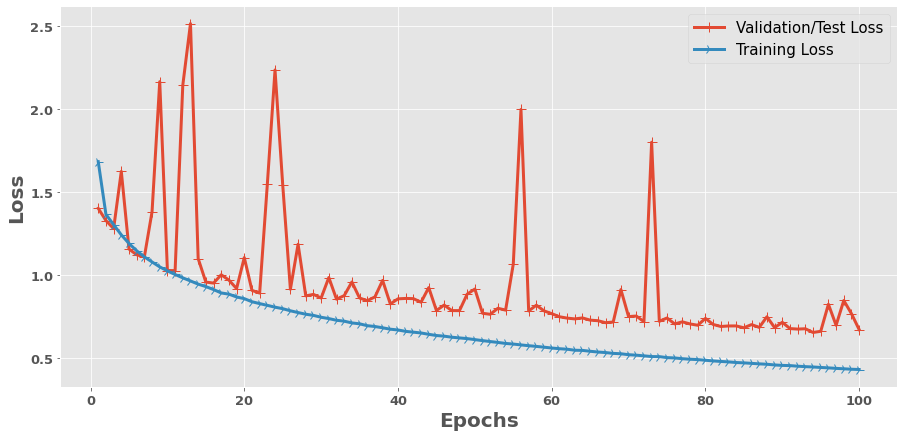

In [16]:
results_path="/home/kashraf/Journal_work_Fall2021/modelling/real_gan_models/thesis results and figures/"
# history=result["history"]

# print(history.keys())
# Plotting our loss charts
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(15,7))
plt.xticks(fontsize=13,weight="bold")
plt.yticks(fontsize=13,weight="bold")
loss_values = result['loss']
val_loss_values =result['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=3.0,marker = '+', markersize=10.0)
plt.setp(line2, linewidth=3.0,marker = '4', markersize=10.0)
plt.xlabel('Epochs',fontsize=20,weight="bold") 
plt.ylabel('Loss',fontsize=20,weight="bold")
plt.grid(True)
plt.xticks(fontsize=13,weight="bold")
plt.yticks(fontsize=13,weight="bold")
plt.legend(fontsize=15)
plt.savefig(results_path+'Stack_Loss_new.png', dpi = 500)
plt.show()


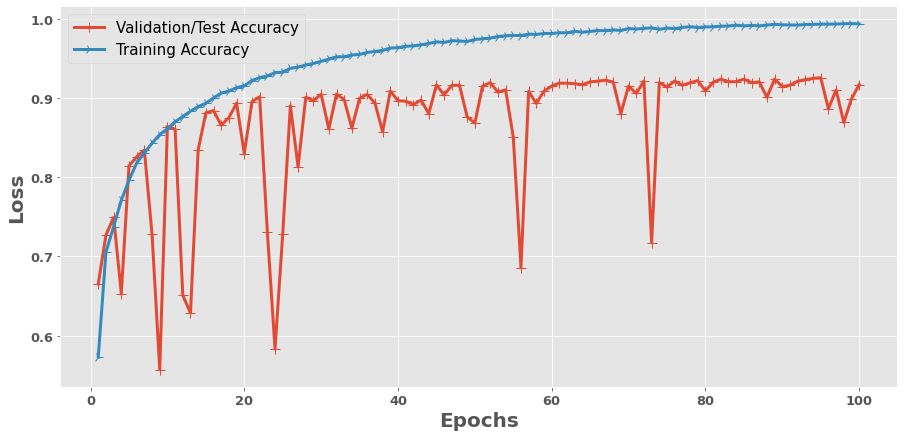

In [18]:
results_path="/home/kashraf/Journal_work_Fall2021/modelling/real_gan_models/thesis results and figures/"
# history=result["history"]

# print(history.keys())
# Plotting our loss charts
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(15,7))
plt.xticks(fontsize=13,weight="bold")
plt.yticks(fontsize=13,weight="bold")
acc_values = result['accuracy']
val_acc_values = result['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values , label='Training Accuracy')
plt.setp(line1, linewidth=3.0,marker = '+', markersize=10.0)
plt.setp(line2, linewidth=3.0,marker = '4', markersize=10.0)
plt.xlabel('Epochs',fontsize=20,weight="bold") 
plt.ylabel('Loss',fontsize=20,weight="bold")
plt.grid(True)
plt.xticks(fontsize=13,weight="bold")
plt.yticks(fontsize=13,weight="bold")
plt.legend(fontsize=15)
plt.savefig(results_path+'Stack_Accuracy.png', dpi = 500)
plt.show()


In [ ]:
import seaborn as sr
import pandas as pd

y_pred=np.argmax(model.predict(validation_generator), axis=1)
y_test=validation_generator.classes

plt.style.use("ggplot")
# y_predict,distances1=  face_recognition(x_test_recog,T_distance)
# accuracy=accuracy_score(y_test_recog,y_predict)
class_names=["CL_1","CL_2","CL_3","CL_4"]
report=classification_report(y_test,y_pred,target_names=class_names)
np.save(results_path+"stack_real_gan_report.npy",report)

conf=confusion_matrix(y_test,y_pred,normalize="true")
conf_df=pd.DataFrame(conf, index=class_names, columns=class_names)
# print("\nFace  accuracy =",accuracy)
print("\n Classification report: \n",report)
fig=plt.figure(figsize=(15,10))
sr.heatmap(conf_df,annot=True,cmap="Blues")
# plt.title("Confusion matrix")
plt.savefig(results_path+"Confusion matrix_stack_gan_&_real.png")
plt.show()